# **Machine Learning simples com Python**

---



#####**Descrição do desafio**

Precisamos prever o valor médio das casas considerando as caracteristicas que temos na base como total de quartos, banheiros, idade do imóvel etc..

######**Challange describe**

We need predict the value of immobile using the characteristics of house in the Data Base


In [ ]:
#importando bases
#Import DataBase

import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_train.csv", sep=',')   
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
#Identificando valores Nulos
#identifying null values or missing

print(df.isna().sum())
print(df.isnull().sum())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
##Neste exemplo nao vou querer utilizar os campos latitude e longitude, portanto vou excluir estas colunas
##This example, I won´t using de columns longitude and latitude

df = df.drop(columns=['longitude','latitude'])
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


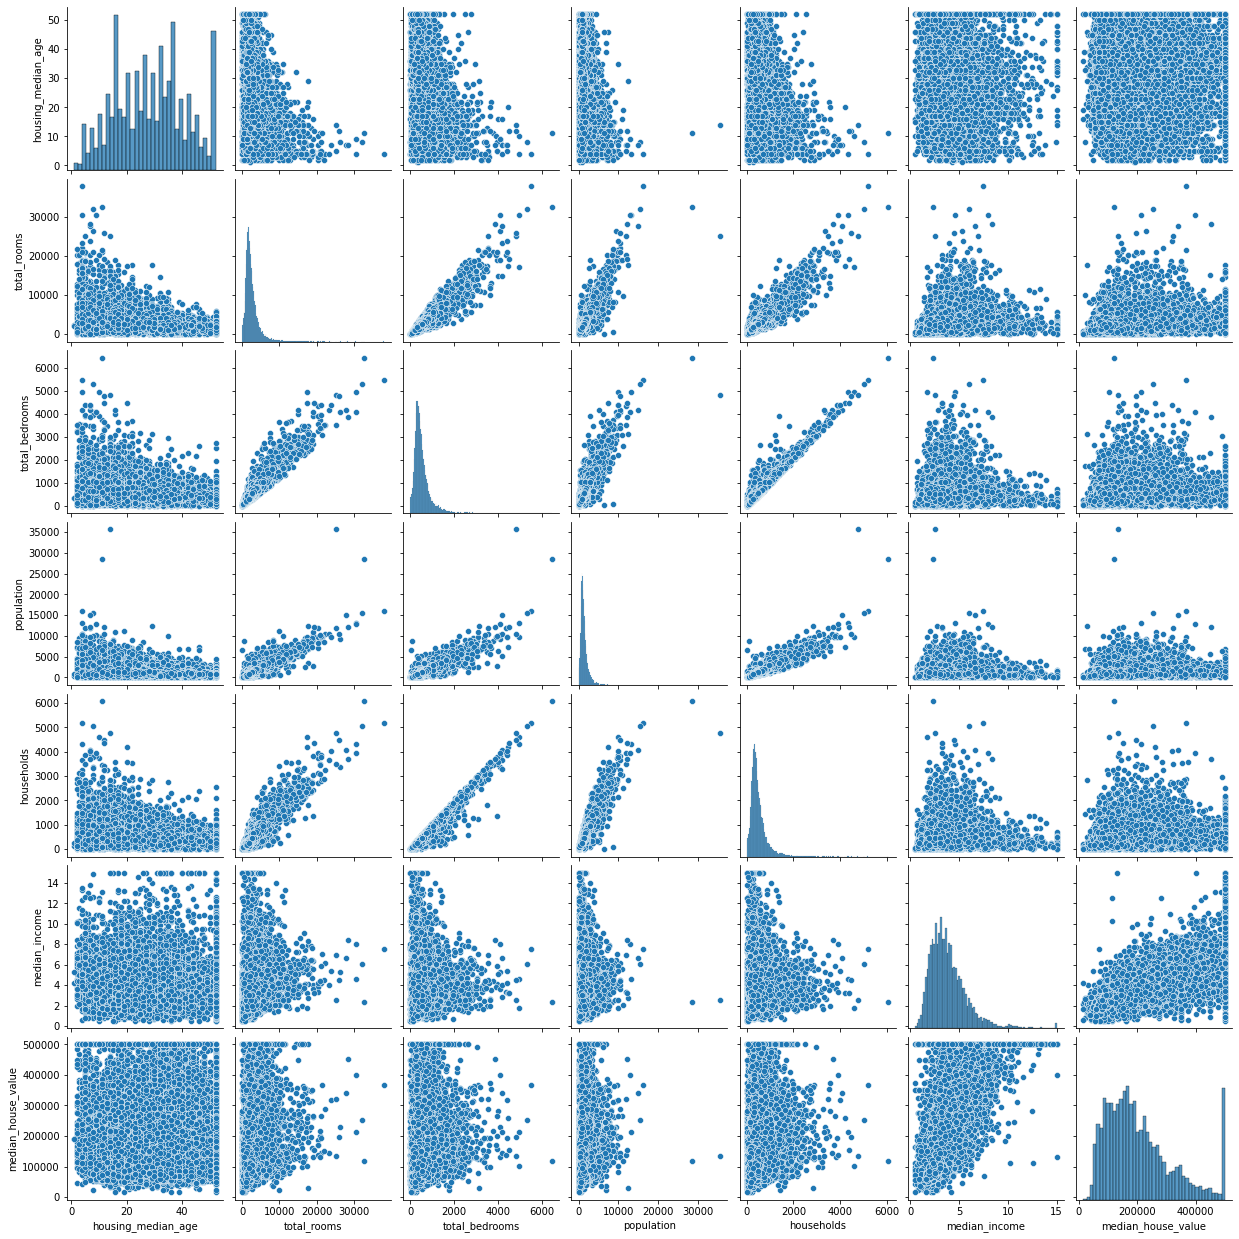

In [ ]:
#Analisando os dados
#Data analysis

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


sb.pairplot(df)
plt.show()

#ATENÇÃO!

Aqui é um ponto importante pois se trata do passo onde você irá treinar seu modelo antes de aplicar o modelo de previsão. Em resumo o modelo pegará randomicamente uma parte para aprender sobre o comportamento e na sequencia você irá testar o modelo com base no que aprendeu. Por default se separa 20%.

##Attention

Here its a very important moment. We need set the data for training, after that, we need testing through what he learned. By Default the tool separates 20%.

In [ ]:
##Separando base para treino e teste
## set data for test and training 

from sklearn.model_selection import train_test_split

y = df['median_house_value']
x = df.drop(['median_house_value'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
#Gerar modelo de Machine learning (Regressão linear e Floresta Randomica)
# Generate Machine learning Model (Linear Regression and Random Forest)


# Lib Regressão linear
from sklearn.linear_model import LinearRegression 
# Lib Floresta Randomica
from sklearn.ensemble import RandomForestRegressor


# Armazenando modelo em uma varavel 
regression_model = LinearRegression()
# Armazenando modelo em uma varavel
forest_random = RandomForestRegressor() 

#Treinando dados
#Data Training
regression_model.fit(x_train, y_train)
forest_random.fit(x_test, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#Segunda etapa importante

Agora vamos ao momento de prever e comparar qual dos dois modelos foram mais aderentes

#Second step (important too)

Now, lets predict and compare both models

In [ ]:
# importando biblioteca
# import lib

from sklearn import metrics

# Aplicando predição
# Predict applying

predict_regressionLinear = regression_model.predict(x_test)
predict_randomForest = forest_random.predict(x_test)


# Comparando modelos
# compare the both models

print(metrics.r2_score(y_test, predict_regressionLinear))
print(metrics.r2_score(y_test,predict_randomForest))

0.5705768445647121
0.9478460735543899


Vimos que o modelo mais aderente foi o Random forest, então podemos dizer que este modelo seria o mais aderente para prevermos o valor da Residencia.

Importante frisar que o objetivo aqui é de uma forma simples elucidar um passo a passo de modelo de regressão

So, the best model is the Random forest, but, the objective here is understanting this steps to create a machine learning models by simple form.



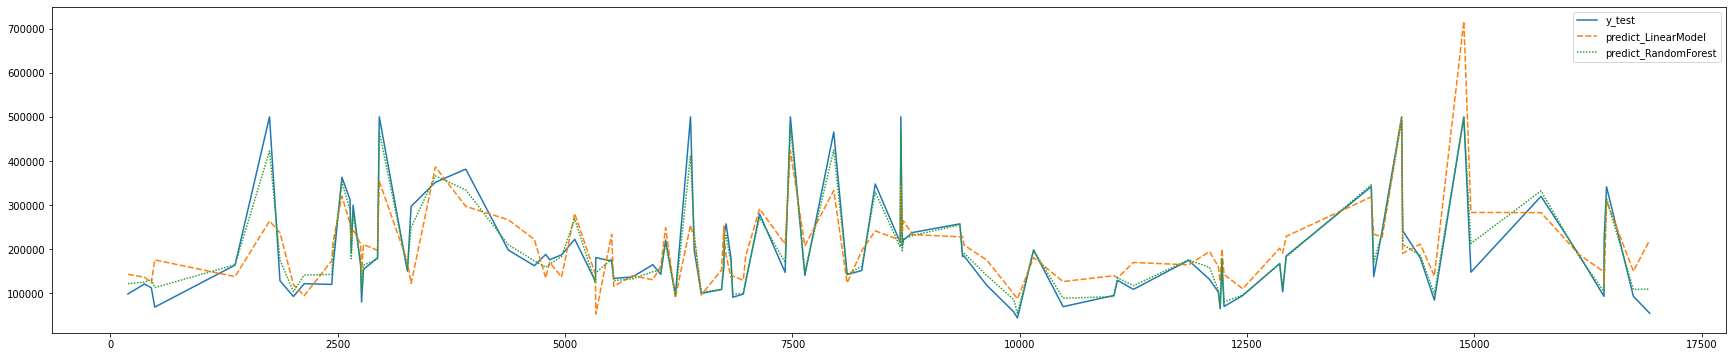

In [ ]:
# Vamos visualizar de forma gráfica
# Lets see some plots

# neste gráfico vamos ver as proximidades de erros e acertos
# this plot, lets see the proximities of hits and misses

table2 = pd.DataFrame()
table2['y_test'] = y_test
table2['predict_LinearModel'] = predict_regressionLinear
table2['predict_RandomForest'] = predict_randomForest

plt.figure(figsize=(30,6))
sb.lineplot(data= table2.head(100)) 
#Trouxe apenas uma amostragem para este grafico ficar mais legível, observe que a linha de Random forest tende a estar mais proxima da real(ytest)
#Im brought a sample for this graph to be more readable, note that the Random forest line tends to be closer to the real(ytest)
plt.show()


#Conclusão

Esta é apenas uma maneira ludica do que podemos fazer através de um algoritmo. Cabe aqui a gente se aprofundar mais em questões de analise exploratoria, ajustes de modelos para evitar overfiting e um universo de detalhes importantes para ação.

#Conclusion

This is just a playful way we can do it using an algorithm. It's up to us to go deeper into issues of exploratory analysis, model adjustments to avoid overfitting and a universe of important details for action.

##Bons estudos!
##Good Studies